In [1]:
import numpy as np
np.random.seed(42)
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import os
from sqlalchemy import create_engine
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pwd

/home/mobin/PycharmProjects/Movie-ADS-Mobin


## How to connect DB
**In this I'm also using my own created .db file will recomend to downlaod from below link and save in root dir.**
 https://drive.google.com/file/d/1eQa7VimGSeDPFv-3Id14K075eoHba642/view?usp=share_link

In [3]:
basedir=os.path.dirname(os.path.abspath("__file__"))
print(basedir)
PATH_TO_DB = os.path.join(basedir, 'movies25M.db')
print(f"Path to DB ==> {PATH_TO_DB}")

/home/mobin/PycharmProjects/Movie-ADS-Mobin
Path to DB ==> /home/mobin/PycharmProjects/Movie-ADS-Mobin/movies25M.db


In [4]:
engine = create_engine(f"sqlite:///{PATH_TO_DB}")
movies_df = pd.read_sql_table("movies_tbl", engine)
movies_df.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [7]:
movies_df.describe()

,movieId,title,genres
count,62423,62423,62423
unique,62423,62325,1639
top,1,The Void (2016),Drama
freq,1,2,9056


In [8]:
engine = create_engine(f"sqlite:///{PATH_TO_DB}")
ratings_df = pd.read_sql_table("ratings_tbl", engine)
ratings_df.head(10)

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
5,1,1088,4.0,1147868495
6,1,1175,3.5,1147868826
7,1,1217,3.5,1147878326
8,1,1237,5.0,1147868839
9,1,1250,4.0,1147868414


In [11]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,25000095,25000095,25000095,25000095
unique,162541,59047,10,20115267
top,72315,356,4.0,825638400
freq,32202,81491,6639798,619


In [ ]:
ratings_df['rating'] = pd.to_numeric(ratings_df['rating'])
ratings_df['userId'] = pd.to_numeric(ratings_df['userId'])
ratings_df['movieId'] = pd.to_numeric(ratings_df['movieId'])

# Bonus 1

### Bonus 1: Find users who have the same taste (users who rate the same movies similarly). 
User with Similar Tast in Movies:

 I try to find the co similarity with full data but It's required to much memory and now I'm going to find the similarity between the user till the recore of 1million in ratings_df.

In [86]:
user_matrix = ratings_df[['userId', 'movieId', 'rating']][:100000].copy()
user_matrix.head()

,userId,movieId,rating
0,1,296,5.0
1,1,306,3.5
2,1,307,5.0
3,1,665,5.0
4,1,899,3.5


In [87]:
user_matrix = user_matrix.pivot(index='userId', columns='movieId', values='rating')
user_matrix.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,207367,207405,207642,207830,207890,208002,208080,208737,208793,208939
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
user_matrix = user_matrix.fillna(0)
user_matrix.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,207367,207405,207642,207830,207890,208002,208080,208737,208793,208939
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
def same_taste_user(user, user_matrix):
    co_sim_list = []
    for i,row in enumerate(user_matrix.values):
        cos = cosine_similarity(user, row.reshape(1, -1))[0][0]
        co_sim_list.append([i, cos])
    co_sim_df = pd.DataFrame(co_sim_list, columns=['userId', 'co_sim'])
    co_sim_df = co_sim_df.sort_values(by=['co_sim'], ascending=False).copy()
    return co_sim_df

In [96]:
user_matrix.iloc[0].values.reshape(1, -1)

array([[0., 0., 0., ..., 0., 0., 0.]])

In [97]:
user_ids = user_matrix.iloc[0].values.reshape(1, -1)
similar_users_similar_rate_df = same_taste_user(user_ids, user_matrix)

### Top 10 Users with similar tast in movies

In [100]:
similar_users_similar_rate_df.head(10)

,userId,co_sim
0,0,1.000000
4504,4504,0.211536
5061,5061,0.210479
6182,6182,0.203140
2591,2591,0.199539
4690,4690,0.189725
5086,5086,0.189204
4786,4786,0.186631
266,266,0.173914
5351,5351,0.169393


### User with no similarities amount other user

In [101]:
similar_users_similar_rate_df[-10:]

,userId,co_sim
1545,1545,0.0
4835,4835,0.0
1546,1546,0.0
4826,4826,0.0
4822,4822,0.0
1556,1556,0.0
4818,4818,0.0
4814,4814,0.0
1563,1563,0.0
4921,4921,0.0


# Super Bonus

### Super Bonus: Create an interesting analytical output from the dataset. This analytical output can be outside the application. You can use any tool to deliver it.


### What is the distribution of ratings for movies in the dataset?

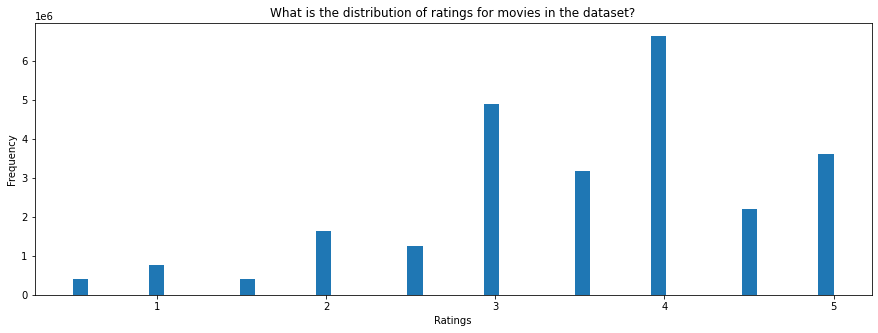

In [18]:
# pd.DataFrame(ratings_df['rating']).plot(kind='bar', color='#4472C4', figsize=(15,5), alpha=0.6)
ratings_df['rating'].plot(kind="hist",figsize=(15,5), bins=50)
plt.title('What is the distribution of ratings for movies in the dataset?')
plt.ylabel('Rating Count')
plt.xlabel('Ratings')
plt.show()

### Most available movide by Genre?

In [39]:
genre_list = list(movies_df.genres)
genre_list = [i for sub in genre_list for i in sub.split('|')]
s_genres_count = pd.DataFrame(pd.Series(genre_list, name='Movie Count').value_counts().head(10)
s_genres_count['Genre'] = s_genres_count.index
s_genres_count

,Movie Count,Genre
Drama,25606,Drama
Comedy,16870,Comedy
Thriller,8654,Thriller
Romance,7719,Romance
Action,7348,Action
Horror,5989,Horror
Documentary,5605,Documentary
Crime,5319,Crime
(no genres listed),5062,(no genres listed)
Adventure,4145,Adventure


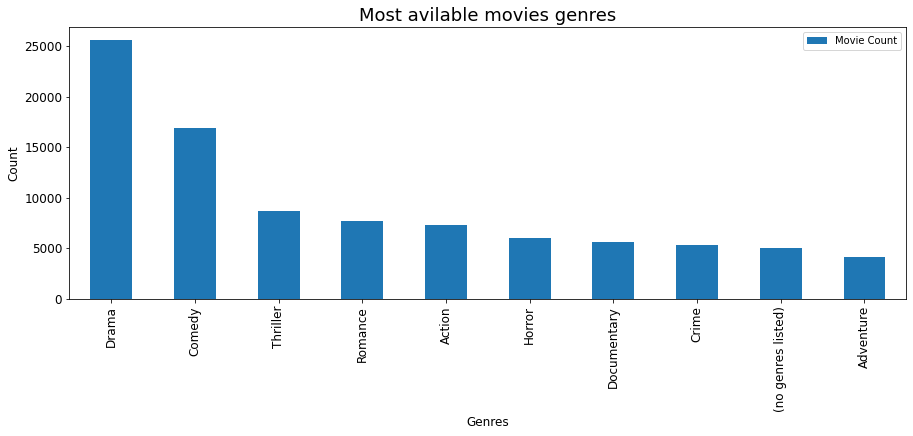

In [45]:
s_genres_count.plot(kind="bar",figsize=(15,5))
plt.title('Most avilable movies genres', size=18)
plt.xticks(size=12)
plt.xlabel('Genres', size=12)
plt.yticks(size=12)
plt.ylabel('Count', size=12)
plt.show()

# Bonus 2

# Recomendation System

In [104]:
movies_df.fillna(0, inplace=True)
ratings_df.fillna(0, inplace=True)

movies_df['genres'] = movies_df['genres'].str.split('|')

In [105]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(ratings_df, test_size=0.2)
